## Try to predict WatchBrands

This is a try to predict watchbrands from a Image instead of predicting the price directly you could first try to get the brand and predict the price with that information known.

The model is trained to predict between 11 different watch brands.

In [1]:
import fastai

from fastai import *
from fastai.vision.all import *

from torchvision.models import *
import pretrainedmodels

from utils import *
import sys
import pickle

In [2]:
path_wiki = Path('data/watches/ds3_crown/cleandata.csv')
path_imdb = Path('data/watches/ds3_crown/images/')

In [3]:
files = get_image_files(path_imdb)
print(f"Pictures in the Dataset: {len(files)}")

Pictures in the Dataset: 26210


In [4]:
label = r'\d+-\d+-(\w+)-\w+\.jpg'

## Filter

In [5]:
filtered_files = []

whatch_brands_inc = ["-OME-", "-ROL-", "-HEU-", "-TAG-", "-BRT-", "-ALS-", "-AUD-", "-BLR-", "CAR", "IWC", "-JLC-"]

for picture_path in files:
    for whatch_brand in whatch_brands_inc:
        if whatch_brand in picture_path.name:
            filtered_files.append(picture_path)

print(f"Pictures in the Dataset: {len(filtered_files)}")

Pictures in the Dataset: 22171


In [6]:
dls = ImageDataLoaders.from_name_re("data/watches/crownandcaliber/images", filtered_files, label, item_tfms=Resize(224))

In [8]:
dls = ImageDataLoaders.from_name_re("data/watches/crownandcaliber/images", filtered_files, label, item_tfms=Resize(224))

In [10]:
%%capture
learn = vision_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

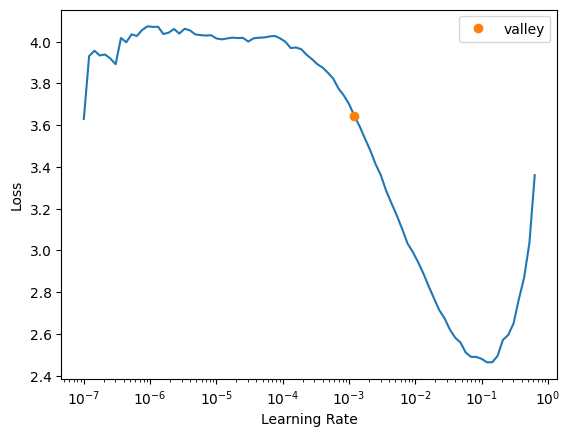

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.504004,0.264539,0.921516,31:15


epoch,train_loss,valid_loss,accuracy,time
0,0.155730,0.195260,0.946775,37:05
1,0.054816,0.057160,0.983536,5:15:51
2,0.011254,0.034039,0.990753,1:34:29


In [13]:
with open("brand_prediction_model.pickle", mode="wb") as out_file:
    pickle.dump(learn, out_file)

## Short Evaluation

This gives a hint for future prjects, that it could work better to start with predicting the brand. 
This isn't a well evaluated model but the accuracy in the Training shows a huge potential for that.